РАСПОЗНАВАНИЕ ИЗОБРАЖЕНИЙ С ПОМОЩЬЮ CNN

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from tensorflow.keras.utils import to_categorical


После импорта библиотек будет произведена загрузка набора данных для обучения и тестирования
x_tr=x train

x_te=x test

y_tr=y train

y_te=y test

In [ ]:
(x_tr,y_tr),(x_te,y_te)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Нормализация набора данных

Тип данных изменяется на 32-битный тип float, а затем нормализуется.

In [ ]:
x_tr=x_tr.astype('float32')
x_te=x_te.astype('float32')
x_tr/=255.0
x_te/=255.0

после нормализации преобразовываем векторы классов в бинарные матрицы классов

In [ ]:
y_tr=to_categorical(y_tr,10)
y_te=to_categorical(y_te,10)

keras Conv2D - это слой двумерной свертки. Этот слой создает ядро свертки, которое наматывается на вход слоев, что позволяет получить тензор выходов.

Kernel: В обработке изображений ядро - это сверточная матрица или маска, которая может использоваться для размытия, повышения резкости, рельефности, определения краев и т. д. путем свертки ядра и изображения.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Компиляция модели осуществляется с помощью (model.compile).

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

Подгонка данных для модели.Здесь данные подгоняются в соответствии с размером партии. Передаются обучающие данные x,y. Затем передаются проверенные данные Test of x,y.

In [ ]:
model.fit(x_tr,y_tr,batch_size=32,epochs=20,validation_data=(x_te,y_te),shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 204s 130ms/step - loss: 1.5256 - accuracy: 0.4392 - val_loss: 1.2226 - val_accuracy: 0.5598
Epoch 2/20
1563/1563 [==============================] - 208s 133ms/step - loss: 1.1761 - accuracy: 0.5797 - val_loss: 1.0216 - val_accuracy: 0.6352
Epoch 3/20
1563/1563 [==============================] - 205s 131ms/step - loss: 1.0200 - accuracy: 0.6377 - val_loss: 0.8841 - val_accuracy: 0.6848
Epoch 4/20
1563/1563 [==============================] - 205s 131ms/step - loss: 0.9304 - accuracy: 0.6709 - val_loss: 0.8228 - val_accuracy: 0.7137
Epoch 5/20
1563/1563 [==============================] - 208s 133ms/step - loss: 0.8680 - accuracy: 0.6952 - val_loss: 0.8407 - val_accuracy: 0.7072
Epoch 6/20
1563/1563 [==============================] - 203s 130ms/step - loss: 0.8305 - accuracy: 0.7069 - val_loss: 0.7571 - val_accuracy: 0.7352
Epoch 7/20
1563/1563 [==============================] - 203s 130ms/step - loss: 0.7900 - accuracy: 0.7224 - val_

Сохранение архитектуры нейронной сети. Здесь данные преобразуются в json, который затем записывается в model_structure.

In [ ]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

6342

Формат сохранения - json. Мы также сохраним обученные нейронные веса для предсказаний.

In [ ]:
model.save_weights("model_weight.h5")

Здесь начинается основная часть работы. Предсказания будут делаться по изображениям на основе меток на них.

In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

class_labels определены, соответственно, разделение производится на основе меток класса.

In [ ]:
class_labels=["Planes","Car","Bird","Cat","Deer","Dog","Frog",
              "Horse","Boat","Truck"]

Загрузка json-файла, содержащего структуру модели, которую мы загрузили после завершения подгонки модели.

write_text для записи данных в json-файл.

read_text для чтения данных из json-файла.

In [ ]:
f=Path("model_structure.json")
model_Structure=f.read_text()

Загрузка изображения выполняется для тестирования. (load_img используется для загрузки изображения) размер используется (32,32), так как при создании модели задан размер (32,32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


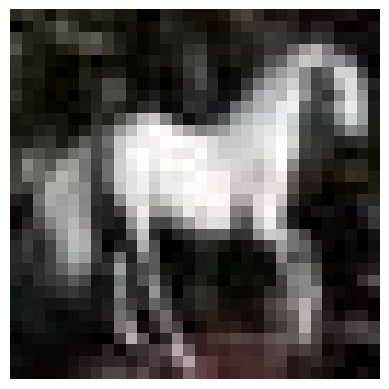

In [84]:
from google.colab import drive
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
drive.mount('/content/drive')
# Загрузка и отображение изображения для тестирования
img = load_img("/content/drive/MyDrive/Colab_Notebooks/horse.jpg", target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

После загрузки изображения в переменную мы должны преобразовать его в массив numpy. Здесь изображение преобразуется в массив, а затем расширяется в соответствии с размерами массива согласно строке. (Для преобразования используется img_to_array)

In [85]:
from tensorflow.keras.utils import img_to_array
imgtest=img_to_array(img)
list_of_image=np.expand_dims(imgtest,axis=0)

После преобразования в массив. Затем на основе массива делаются прогнозы.

In [86]:
res=model.predict(list_of_image)

1/1 [==============================] - 0s 22ms/step


Учитывается только один результат, так как берется только одно изображение. Если есть группа изображений, то запускается цикл, или набор данных классифицируется соответствующим образом. Распечатывается массив для всех меток.

In [87]:
sr=res[0]
print(sr)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Мы получим оценку, которая представляет собой вероятность всех 10 возможных классов. Когда изображение получает наивысшую оценку вероятности, ему присваивается метка. В результате будет выведена метка изображения.

In [88]:
mostlci=int(np.argmax(sr))
clh=class_labels[mostlci]
print(clh,mostlci)

Horse 7
